In [98]:
import sys
sys.path.append('../')
%reload_ext autoreload
%autoreload 2

### Basic usage

- import colors and templates from oistyle
- pass template to plotly (express)

In [ ]:
import plotly.express as px
import pandas as pd
from python.plotly import bar_chart_template, colors, line_chart_template

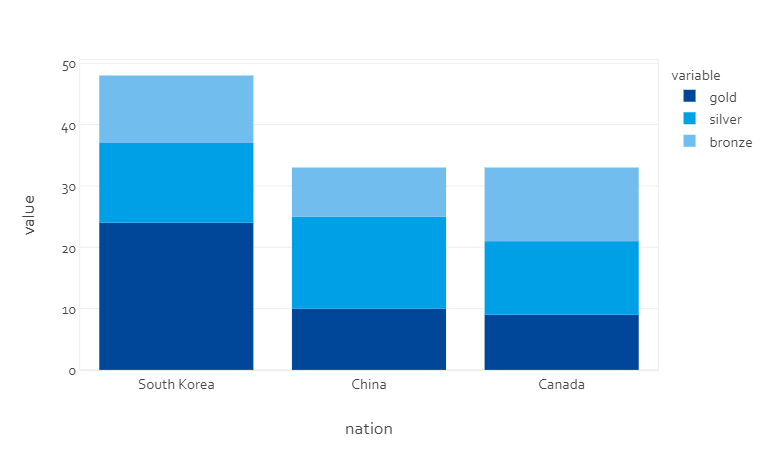

In [99]:

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], template=bar_chart_template)
fig.show()

### Using colors

For coloring discrete classes, pass a color sequence from the `colors` collection to `color_discrete_sequence`. Combinations are also possible.

In [ ]:
from python.plotly import bar_chart_template, colors, line_chart_template

df = px.data.gapminder().query("continent=='Europe'")
df = df[(df.country.isin(df.country.unique()[:8]))&(df.year.isin([1982, 1992, 2002]))]
fig = px.bar(df, x="year", y="lifeExp", color='country', template=line_chart_template, color_discrete_sequence=colors['rainbow_9'], barmode='group')
fig.update_layout(dict(xaxis_title_text='', yaxis_title_text='', legend_title_text='', ))
fig.show()

Below we use the color sequence used for a value statement (agree / disagree / etc), but the order of the color sequence is the reverse from the order of our data, which is why we reverse the list. This particular sequence also doesn't include a color for _unknown_ or _don't know_, so this is added to the sequence manually. 

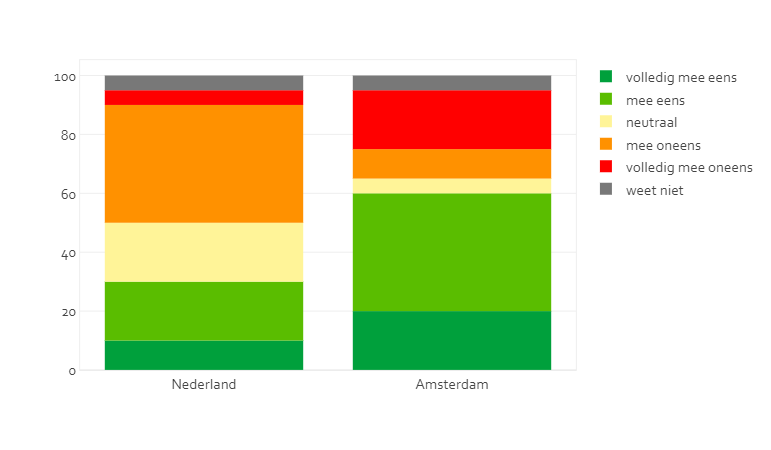

In [104]:
df = pd.DataFrame({"value": [10, 20, 20, 40, 5, 5, 20, 40, 5,10, 20, 5], 
                   "answer": ['volledig mee eens', 'mee eens', 'neutraal', 'mee oneens', 'volledig mee oneens', 'weet niet', 'volledig mee eens', 'mee eens', 'neutraal', 'mee oneens', 'volledig mee oneens', 'weet niet'],
                  "ne_ams": ["Nederland","Nederland","Nederland","Nederland","Nederland","Nederland","Amsterdam","Amsterdam","Amsterdam","Amsterdam","Amsterdam","Amsterdam",]})

fig = px.bar(df, x="ne_ams", y="value", color='answer', template=line_chart_template, color_discrete_sequence=colors['red_green_gradient_5'][::-1]+colors['unknown'])
fig.update_layout(dict(xaxis_title_text='', yaxis_title_text='', legend_title_text='', ))
fig.show()

### Postprocessing

Plotly takes axis and legend labels from the data, overwriting any values stored in the template. That means we have to alter or remove the axis and legend labels after generating the plot. This is done with the `update_layout` method.

In [ ]:
from python.plotly import bar_chart_template, colors, line_chart_template

df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="lifeExp", color='country', template=line_chart_template, color_discrete_sequence=colors['rainbow_9'])
fig.update_layout(dict(xaxis_title_text='', yaxis_title_text='', legend_title_text='', ))
fig.show()